<a target="_blank" href="https://colab.research.google.com/drive/1CzPcKFn5wqg9Dm6U77NpofVUJW1vfULO?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Dataset Used:**

Linnerrud Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html

In [ ]:
from sklearn.datasets import load_linnerud
import pandas as pd

# Loading the Linnerrud dataset
linnerud_data = load_linnerud()

# Exploring the dataset structure
# The Linnerrud dataset contains data about physical exercise and physiological measurements

# Creating a DataFrame for the exercise data
exercise_df = pd.DataFrame(linnerud_data.data, columns=linnerud_data.feature_names)

# Creating a DataFrame for the physiological data
physiological_df = pd.DataFrame(linnerud_data.target, columns=linnerud_data.target_names)

# Displaying the first few rows of both DataFrames for a basic overview
exercise_df_head = exercise_df.head()
physiological_df_head = physiological_df.head()

(exercise_df_head, physiological_df_head)

(   Chins  Situps  Jumps
 0    5.0   162.0   60.0
 1    2.0   110.0   60.0
 2   12.0   101.0  101.0
 3   12.0   105.0   37.0
 4   13.0   155.0   58.0,
    Weight  Waist  Pulse
 0   191.0   36.0   50.0
 1   189.0   37.0   52.0
 2   193.0   38.0   58.0
 3   162.0   35.0   62.0
 4   189.0   35.0   46.0)

(           Chins      Situps      Jumps
 count  20.000000   20.000000   20.00000
 mean    9.450000  145.550000   70.30000
 std     5.286278   62.566575   51.27747
 min     1.000000   50.000000   25.00000
 25%     4.750000  101.000000   39.50000
 50%    11.500000  122.500000   54.00000
 75%    13.250000  210.000000   85.25000
 max    17.000000  251.000000  250.00000,
            Weight      Waist      Pulse
 count   20.000000  20.000000  20.000000
 mean   178.600000  35.400000  56.100000
 std     24.690505   3.201973   7.210373
 min    138.000000  31.000000  46.000000
 25%    160.750000  33.000000  51.500000
 50%    176.000000  35.000000  55.000000
 75%    191.500000  37.000000  60.500000
 max    247.000000  46.000000  74.000000)

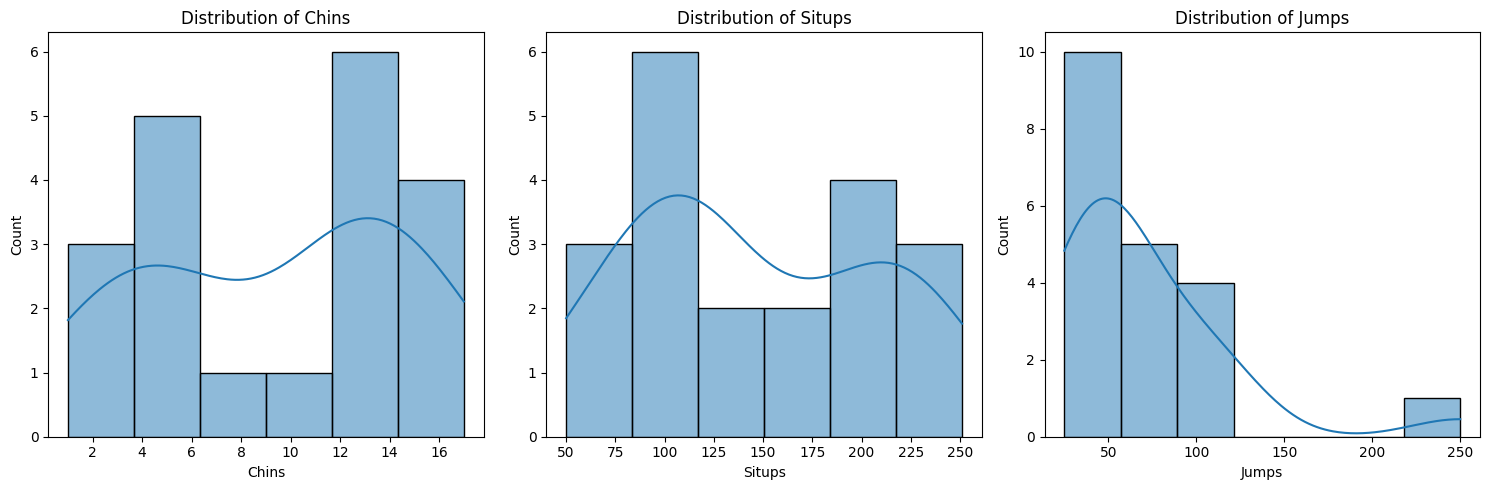

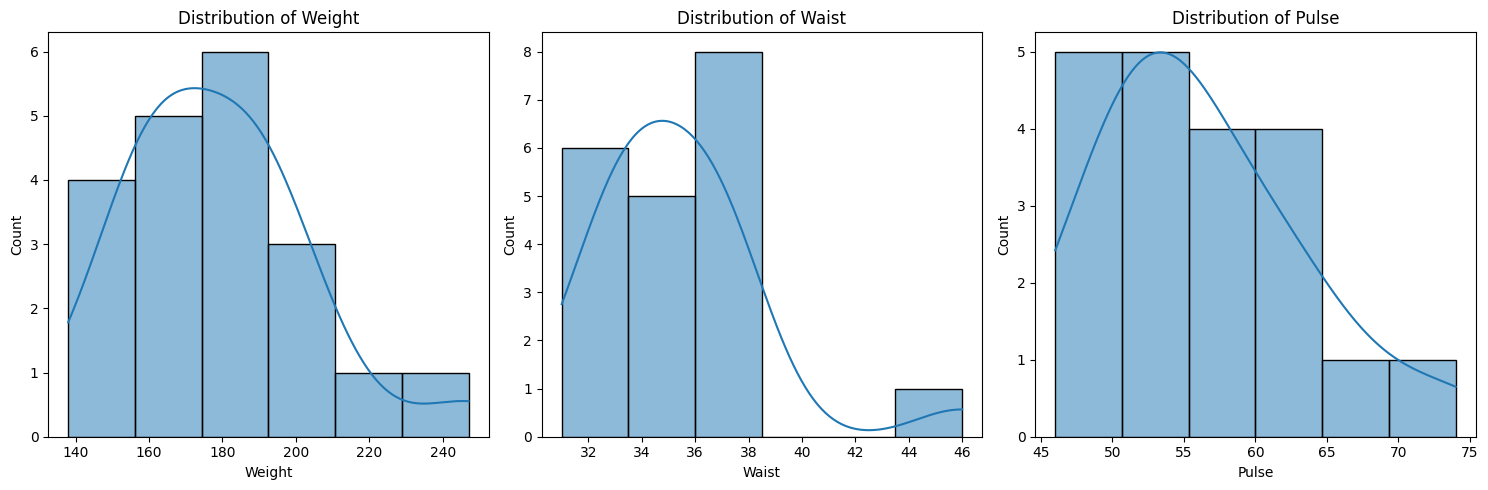

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of the exercise data
exercise_stats = exercise_df.describe()

# Statistical summary of the physiological data
physiological_stats = physiological_df.describe()

# Data visualization
# Histograms for exercise data
plt.figure(figsize=(15, 5))
for i, column in enumerate(exercise_df.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(exercise_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

# Histograms for physiological data
plt.figure(figsize=(15, 5))
for i, column in enumerate(physiological_df.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(physiological_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

exercise_stats, physiological_stats

(Chins     0
 Situps    0
 Jumps     0
 dtype: int64,
 Weight    0
 Waist     0
 Pulse     0
 dtype: int64)

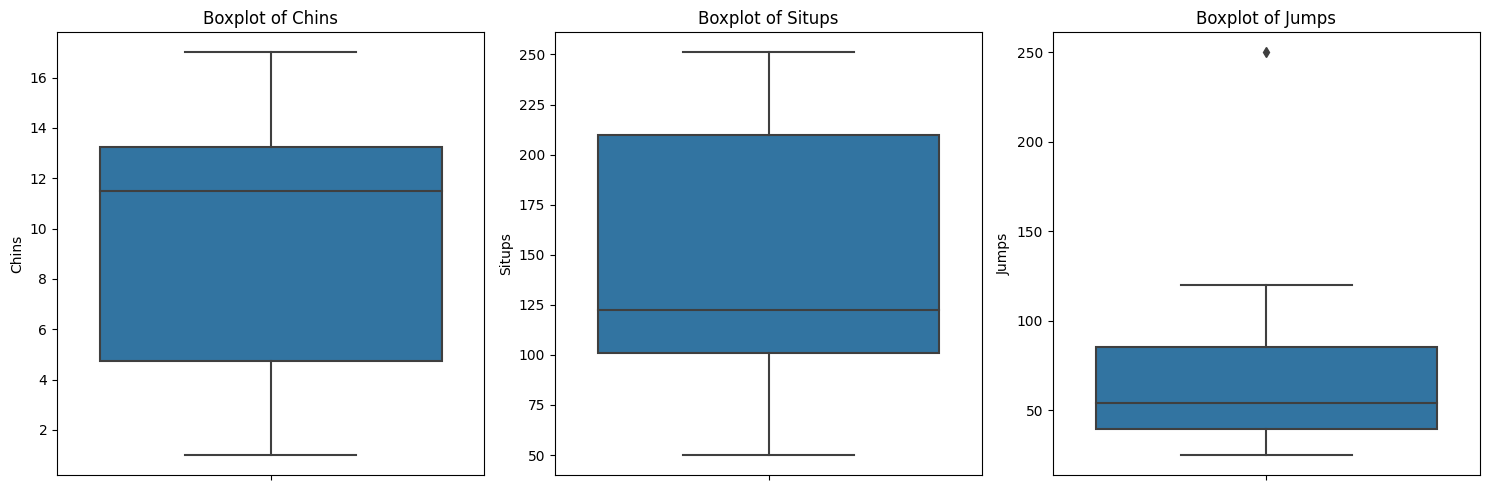

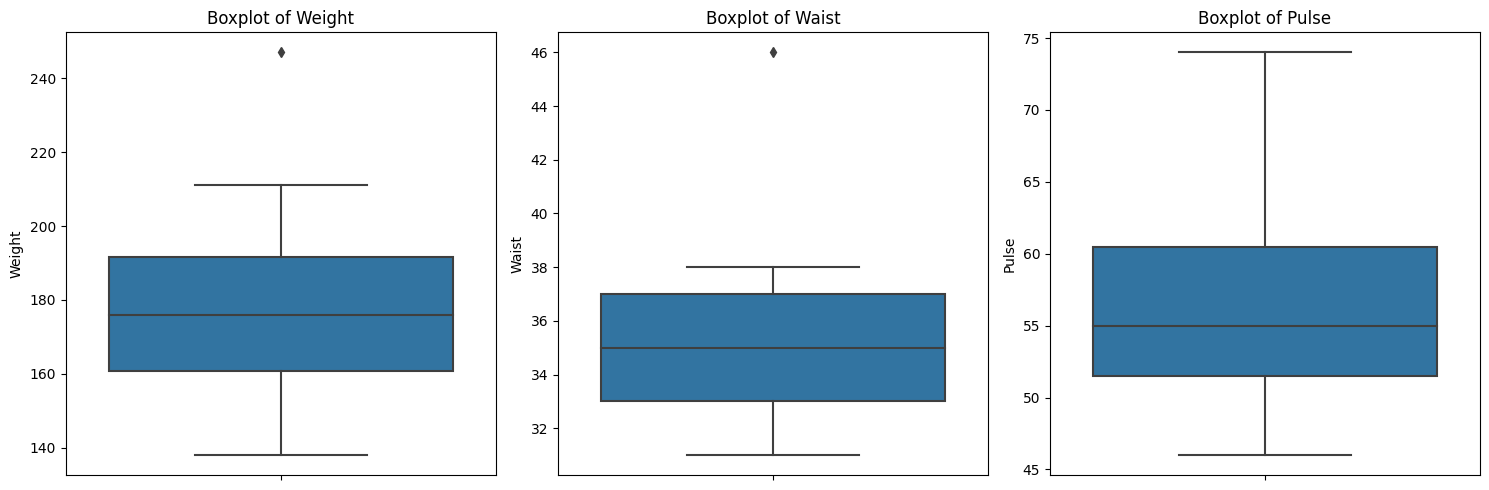

In [ ]:
# Data Cleaning and Pre-processing

# Checking for missing values in both datasets
missing_values_exercise = exercise_df.isnull().sum()
missing_values_physiological = physiological_df.isnull().sum()

# Since this is a small dataset, we'll also check for outliers visually
# Box plots for exercise data
plt.figure(figsize=(15, 5))
for i, column in enumerate(exercise_df.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=exercise_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()

# Box plots for physiological data
plt.figure(figsize=(15, 5))
for i, column in enumerate(physiological_df.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=physiological_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()

(missing_values_exercise, missing_values_physiological)

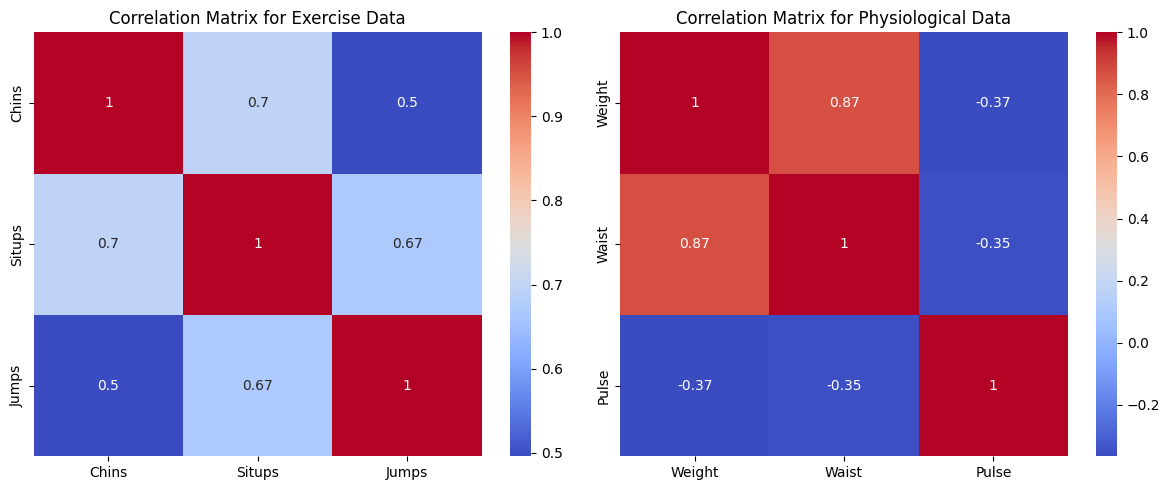

In [ ]:
# Feature Selection

# For the purpose of this analysis, we will consider all features in both datasets.
# However, it's important to understand the relationships between these features.
# We'll create correlation matrices to see how different features are related.

# Correlation matrix for exercise data
corr_exercise = exercise_df.corr()

# Correlation matrix for physiological data
corr_physiological = physiological_df.corr()

# Plotting the correlation matrices
plt.figure(figsize=(12, 5))

# Correlation matrix for exercise data
plt.subplot(1, 2, 1)
sns.heatmap(corr_exercise, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Exercise Data')

# Correlation matrix for physiological data
plt.subplot(1, 2, 2)
sns.heatmap(corr_physiological, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Physiological Data')

plt.tight_layout()

In [ ]:
!pip install umap-learn

In [ ]:
import umap
from sklearn.cluster import KMeans

# Using UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


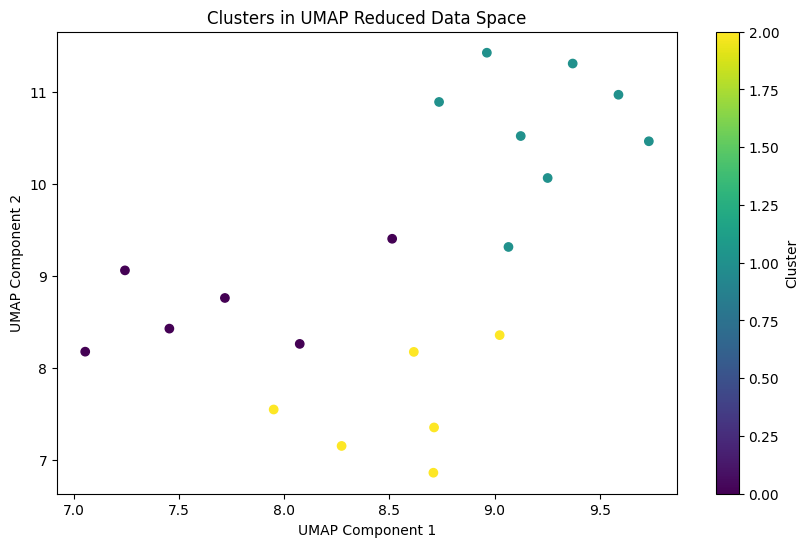

array([1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0],
      dtype=int32)

In [ ]:
combined_df = pd.concat([exercise_df, physiological_df], axis=1)

umap_reduced_data = umap_model.fit_transform(combined_df)

# Applying K-Means clustering on the UMAP reduced data
kmeans_model = KMeans(n_clusters=3, random_state=42)
umap_clusters = kmeans_model.fit_predict(umap_reduced_data)

# Visualizing the clusters in UMAP reduced data
plt.figure(figsize=(10, 6))
plt.scatter(umap_reduced_data[:, 0], umap_reduced_data[:, 1], c=umap_clusters, cmap='viridis', marker='o')
plt.title('Clusters in UMAP Reduced Data Space')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Returning the cluster labels for further analysis
umap_clusters

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preparing the data for classification
X = combined_df
y = umap_clusters

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.3333333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       1.00      0.25      0.40         4\n           2       0.33      1.00      0.50         1\n\n    accuracy                           0.33         6\n   macro avg       0.44      0.42      0.30         6\nweighted avg       0.72      0.33      0.35         6\n')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


({'max_depth': 10,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9333333333333332)